# <center><font color="red"> REDS : Static and Dynamic Hand Gestures </font> </center>

Pour le moment nous allons uniquement travailler sur le jeu de données qui concerne les gestes de main statiques

In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import collections

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

Ouverture du fichier et extraction des données

In [12]:

filename = "SG24_dataset.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())

    # Get the data
    data = list(f[list(f.keys())[0]])
    target = list(f[list(f.keys())[1]]) 
    user = list(f[list(f.keys())[2]]) 
    
data = np.array(data).T
target = np.array(target).reshape(-1)
user = np.array(user).reshape(-1)

print("Original size : ", data.shape, target.shape, user.shape)

Keys: <KeysViewHDF5 ['Predictors', 'Target', 'User']>
Original size :  (2400, 29) (2400,) (2400,)


## <font color="blue"> I - Description très rapide des données (2-3 lignes max) </font>

Dans un premier temps, nous allons rapidement présenter les données dans le fichier <font color="green"> *static hand gestures* </font> :

Le fichier est divisé en trois parties : la première contient les mesures relevées par 29 *features* ou capteurs avec au total 2400 observations de 24 gestes différents, la deuxième partie contient justement les types ou classes des gestes et la dernière renseigne sur l'utilisateur qui a réalisé le geste sachant qu'il y a 8 utilisateurs en tout.

## <font color="blue"> II - Répartition des classes et utilisateurs </font>

Pour avoir un aperçu de nos données, on pourrait observer la répartition de nos classes et utilisateurs, déjà pour savoir s'ils sont équilibrés ou pas

Text(0, 0.5, 'effectif')

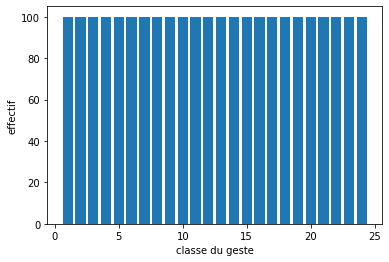

In [13]:
unique, counts = np.unique(target, return_counts=True)

plt.bar(unique, counts)
plt.xlabel("classe du geste")
plt.ylabel("effectif")

Text(0, 0.5, 'effectif')

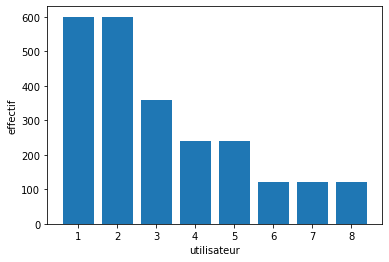

In [14]:
unique, counts = np.unique(user, return_counts=True)

plt.bar(unique, counts)
plt.xlabel("utilisateur")
plt.ylabel("effectif")

On observe que le nombre de classe est équilibré concernant les gestes mais pas pour les utilisateurs qui sont un peu plus dispersés avec plus de gestes réalisés par les utilisateurs 1 et 2 que 6, 7 ou 8 

## <font color="blue"> III - Exemples de mesures relevées pour 2 ou 3 gestes </font>

On nous précise dans l'énoncé qu'il y a plusieurs utilisateurs, avec plusieurs mesures ce qui peut poser problème par la suite. On souhaiterait observer les mesures relevées par nos capteurs pour un même geste par un même utilisateur et également par plusieurs utilisateurs différents dans le but de relever une tendance ou des régularités.

In [26]:
t1_u1 = np.where((target == 1) & (user == 1))[0]
t1_u3 = np.where((target == 1) & (user == 3))[0]
t1_u6 = np.where((target == 1) & (user == 6))[0]

t10_u1 = np.where((target == 10) & (user == 1))[0]
t10_u3 = np.where((target == 10) & (user == 3))[0]
t10_u6 = np.where((target == 10) & (user == 6))[0]

t20_u1 = np.where((target == 20) & (user == 1))[0]
t20_u3 = np.where((target == 20) & (user == 3))[0]
t20_u6 = np.where((target == 20) & (user == 6))[0]


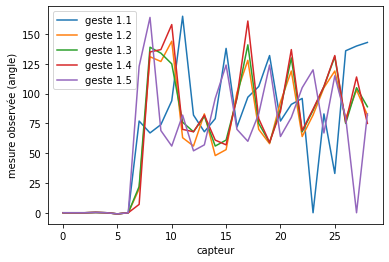

In [27]:
for i in range(5):
    plt.plot(data[t1_u1[i]], label="geste 1."+str(i+1))
    plt.legend()

plt.xlabel("capteur")
plt.ylabel("mesure observée (angle)")
plt.show()

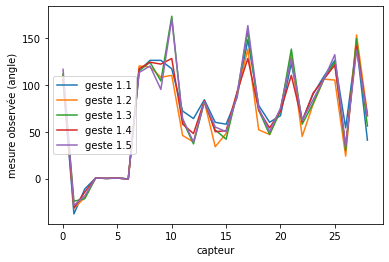

In [56]:
for i in range(5):
    plt.plot(data[t1_u3[i]], label="geste 1."+str(i+1))
    plt.legend()

plt.xlabel("capteur")
plt.ylabel("mesure observée (angle)")
plt.show()

In [ ]:
for i in range(5):
    plt.plot(data[t1_u6[i]], label="geste 1."+str(i+1))
    plt.legend()

plt.xlabel("capteur")
plt.ylabel("mesure observée (angle)")
plt.show()

In [ ]:
for i in range(5):
    plt.plot(data[t10_u1[i]], label="geste 10."+str(i+1))
    plt.legend()

plt.xlabel("capteur")
plt.ylabel("mesure observée (angle)")
plt.show()

In [ ]:
for i in range(5):
    plt.plot(data[t10_u3[i]], label="geste 10."+str(i+1))
    plt.legend()

plt.xlabel("capteur")
plt.ylabel("mesure observée (angle)")
plt.show()

In [ ]:
for i in range(5):
    plt.plot(data[t10_u6[i]], label="geste 10."+str(i+1))
    plt.legend()

plt.xlabel("capteur")
plt.ylabel("mesure observée (angle)")
plt.show()

In [ ]:
for i in range(5):
    plt.plot(data[t20_u1[i]], label="geste 20."+str(i+1))
    plt.legend()

plt.xlabel("capteur")
plt.ylabel("mesure observée (angle)")
plt.show()

In [ ]:
for i in range(5):
    plt.plot(data[t20_u3[i]], label="geste 20."+str(i+1))
    plt.legend()

plt.xlabel("capteur")
plt.ylabel("mesure observée (angle)")
plt.show()

for i in range(5):
    plt.plot(data[t20_u6[i]], label="geste 20."+str(i+1))
    plt.legend()

plt.xlabel("capteur")
plt.ylabel("mesure observée (angle)")
plt.show()

Sur les gestes observés, pour l'instant sans faire attention aux valeurs relevées par nos capteurs on observe pour les utilisateurs 3 et 6 une certaine tendance pour le même geste effectué (1, 10 ou 20) alors que pour l'utilisateur 1, même en faisant le même geste on observe beaucoup d'irrégularités sur les valeurs observées. On remarque également que les valeurs ne se retrouvent pas dans le même intervalle selon le geste

## <font color="blue"> IV - Séparation des données </font>

Séparation sans aucune distinction des utilisateurs, ie ils peuvent se retrouver aussi bien en train qu'en test

In [71]:
X_train, X_test, y_train, y_test = train_test_split( data, target, test_size=0.2, random_state=42)

print("After split : ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

After split :  (1920, 29) (480, 29) (1920,) (480,)


Séparation en k fold où on sépare en test un seul type d'utilisateur et on garde en train le reste

In [54]:
def get_custom_folds(data, target, user):
    data_custom = {}
    for i in range(1, 9):
        X_train = data[np.where(user != i)[0]]
        X_test = data[np.where(user == i)[0]]
        y_train = target[np.where(user != i)[0]]
        y_test = target[np.where(user == i)[0]]
        data_custom[i] = [X_train, X_test, y_train, y_test]
    return data_custom

data_custom = get_custom_folds(data, target, user)



In [55]:
data_custom[1][0].shape, data_custom[1][1].shape, data_custom[1][2].shape, data_custom[1][3].shape

((1800, 29), (600, 29), (1800,), (600,))

## <font color="blue"> V - Baselines </font>

Dans un premier temps nous allons mettre en place quelques baselines pour avoir un point de départ, nous tenterons ensuite de voir comment on peut améliorer les scores obtenus

### Dumb strat

In [53]:
strategies = ["stratified", "most_frequent", "uniform"] 

for s in strategies:
    dummy_clf = DummyClassifier(strategy=s)#.fit(X_train, y_train)
    scores = cross_val_score(dummy_clf, data, target, cv=8)
    #print("Stratégie : "+s+" : "+str(dummy_clf.score(X_test, y_test)))
    print("Stratégie {} {} +/- {}".format(s, scores.mean(), scores.std()))

Stratégie stratified 0.03958333333333333 +/- 0.0063327850639877765
Stratégie most_frequent 0.04 +/- 0.0
Stratégie uniform 0.03916666666666667 +/- 0.011636866703140784


### Decision Tree

In [49]:
scores = []
for i in range(0, 20):

    clf = DecisionTreeClassifier(max_depth=i+1, splitter="random", random_state=0).fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

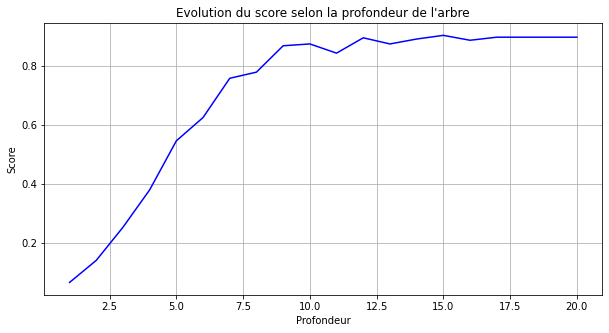

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.grid()
ax.set(xlabel='Profondeur', ylabel='Score',
       title="Evolution du score selon la profondeur de l'arbre")

plt.plot(np.arange(1, len(scores)+1), scores, 'b')


plt.show()

In [67]:
scores = []

for key, value in data_custom.items():
    X_train = data_custom[key][0]
    X_test = data_custom[key][1]
    y_train = data_custom[key][2]
    y_test = data_custom[key][3]
    
    clf = DecisionTreeClassifier(max_depth=10, splitter="random", random_state=0).fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    
print("Moyenne : {} & STD : {} ".format(np.mean(scores), np.std(scores))) 

Moyenne : 0.7648263888888889 & STD : 0.0672309649818592 


### KNN

In [111]:
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
neigh.score(X_test, y_test)

0.9375

In [65]:
scores = []

for key, value in data_custom.items():
    X_train = data_custom[key][0]
    X_test = data_custom[key][1]
    y_train = data_custom[key][2]
    y_test = data_custom[key][3]
    
    neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
    scores.append(neigh.score(X_test, y_test))
    
print("Moyenne : {} & STD : {} ".format(np.mean(scores), np.std(scores))) 

Moyenne : 0.8715277777777778 & STD : 0.05663874584473248 


### Random Forests

In [72]:
scores = []
for i in range(1, 21):

    clf = RandomForestClassifier(max_depth=i, random_state=0).fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))


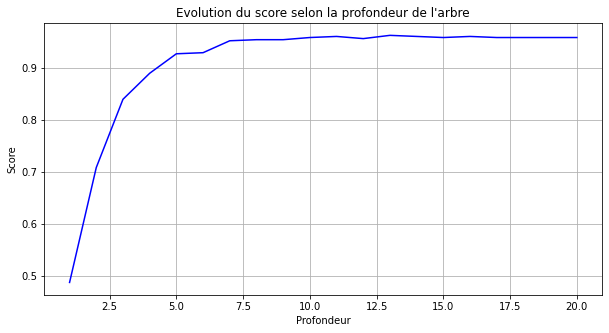

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.grid()
ax.set(xlabel='Profondeur', ylabel='Score',
       title="Evolution du score selon la profondeur de l'arbre")

plt.plot(np.arange(1, len(scores)+1), scores, 'b')


plt.show()

In [74]:
scores = []

for key, value in data_custom.items():
    X_train = data_custom[key][0]
    X_test = data_custom[key][1]
    y_train = data_custom[key][2]
    y_test = data_custom[key][3]
    
    clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    
print(scores)
print("Moyenne : {} & STD : {} ".format(np.mean(scores), np.std(scores))) 

[0.8633333333333333, 0.925, 0.9111111111111111, 0.9416666666666667, 0.9416666666666667, 0.9833333333333333, 0.9333333333333333, 0.95]
Moyenne : 0.9311805555555555 & STD : 0.032293309396686544 


### Gaussian Naives Bayes

In [68]:
gnb = GaussianNB().fit( X_train, y_train )
gnb.score(X_test, y_test)

0.9229166666666667

### Bordel / Sélection features

In [173]:
scores_gnb = []
scores_dt = []
scores_knn = []

for i in range(29):
    #randfeat = np.random.choice(26, 1, replace=False)
    gnb = GaussianNB().fit( X_train[:, i].reshape(-1,1), y_train )
    scores_gnb.append( gnb.score(X_test[:, i].reshape(-1,1), y_test) )
    
    clf_dt = DecisionTreeClassifier(splitter="random", random_state=0).fit(X_train[:, i].reshape(-1,1), y_train)
    scores_dt.append( clf_dt.score(X_test[:,i].reshape(-1,1), y_test))
    
    clf_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train[:, i].reshape(-1,1), y_train)
    scores_knn.append( clf_knn.score(X_test[:,i].reshape(-1,1), y_test) )

In [174]:
sorted_gnb = np.flip(np.argsort(scores_gnb))

In [175]:
sorted_dt = np.flip(np.argsort(scores_dt))

In [176]:
sorted_knn = np.flip(np.argsort(scores_knn))

In [180]:
scores = []

for i in range(29):

    if i == 0:
        clf_dt = DecisionTreeClassifier(splitter="random", random_state=0).fit(X_train[:, sorted_dt[i]].reshape(-1,1), y_train)
        scores.append( clf_dt.score(X_test[:, sorted_dt[i] ].reshape(-1,1), y_test))
    else:
        clf_dt = DecisionTreeClassifier(splitter="random", random_state=0).fit(X_train[:, sorted_dt[:i+1] ].reshape(-1,i+1), y_train)
        scores.append( clf_dt.score(X_test[:, sorted_dt[:i+1] ].reshape(-1,i+1), y_test))
        
scores

[0.2,
 0.4041666666666667,
 0.5270833333333333,
 0.6416666666666667,
 0.6729166666666667,
 0.6708333333333333,
 0.7583333333333333,
 0.7875,
 0.7645833333333333,
 0.8229166666666666,
 0.8229166666666666,
 0.8666666666666667,
 0.8458333333333333,
 0.8770833333333333,
 0.88125,
 0.86875,
 0.8791666666666667,
 0.8770833333333333,
 0.8729166666666667,
 0.875,
 0.8729166666666667,
 0.8666666666666667,
 0.875,
 0.8708333333333333,
 0.8708333333333333,
 0.9,
 0.88125,
 0.8770833333333333,
 0.85]

In [118]:
scores = []

for i in range(29):

    if i == 0:
        clf = KNeighborsClassifier(n_neighbors=3).fit(X_train[:, sorted_dt[i]].reshape(-1,1), y_train)
        scores.append( clf.score(X_test[:, sorted_dt[i] ].reshape(-1,1), y_test))
    else:
        clf = KNeighborsClassifier(n_neighbors=3).fit(X_train[:, sorted_dt[:i+1] ].reshape(-1,i+1), y_train)
        scores.append( clf.score(X_test[:, sorted_dt[:i+1] ].reshape(-1,i+1), y_test))
        
scores

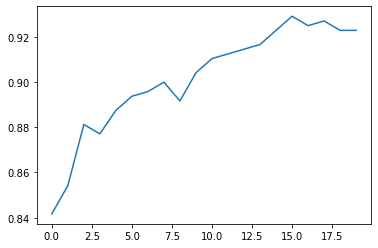

In [138]:
scores = []

for i in range(29):

    if i == 0:
        clf_dt = GaussianNB().fit(X_train[:, sorted_dt[i]].reshape(-1,1), y_train)
        scores.append( clf_dt.score(X_test[:, sorted_dt[i] ].reshape(-1,1), y_test))
    else:
        clf_dt = GaussianNB().fit(X_train[:, sorted_dt[:i+1] ].reshape(-1,i+1), y_train)
        scores.append( clf_dt.score(X_test[:, sorted_dt[:i+1] ].reshape(-1,i+1), y_test))
        
plt.plot(scores[-20:])


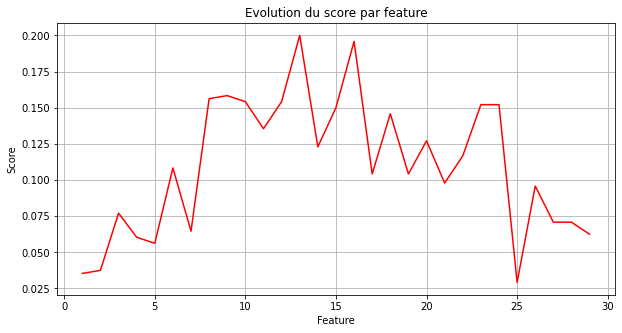

In [179]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.grid()
ax.set(xlabel='Feature', ylabel='Score',
       title="Evolution du score par feature")

plt.plot(np.arange(1, len(scores_dt)+1), scores_dt, 'r')


plt.show()

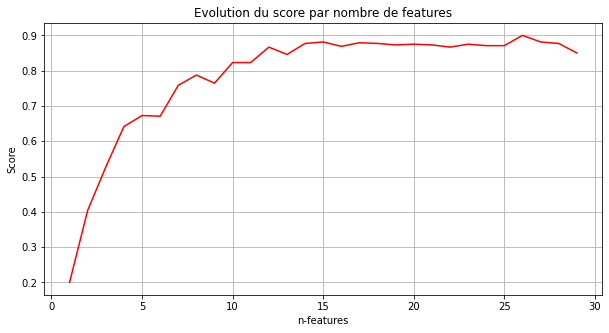

In [182]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.grid()
ax.set(xlabel='n-features', ylabel='Score',
       title="Evolution du score par nombre de features")

plt.plot(np.arange(1, len(scores)+1), scores, 'r')


plt.show()